**Homework 8**

*Alexandra Beikert, Pascal Huber, León-Alexander Hühn*

*1. Solve numerically, using rk4, the above coupled set of equations for the values $r = 0.5, 1.15, 1.3456, 24.0 and 28$. Choose the initial conditions near one ofthe fixed points: $C_{\pm}$ for $r > 1$ and $(0,0,0)$ for $r < 1$. Explain the behavior, as much as possible, with the stability properties of the fixed points.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import rk4
%matplotlib inline

In [6]:
# Values given by the exercise
sigma = 10
b = 8/3
r = np.array([0.5, 1.15, 1.3456, 24., 28.])
a0 = np.sqrt(b*(r-1))
C_plus = np.array([a0, a0, r-1])
C_minus = np.array([-a0,-a0,r-1])

C:\Users\Danda\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


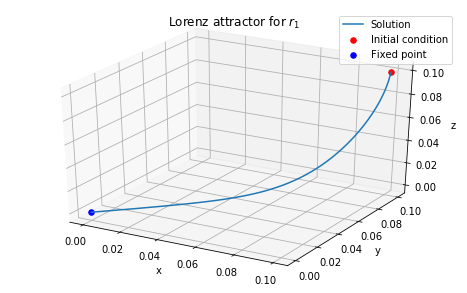

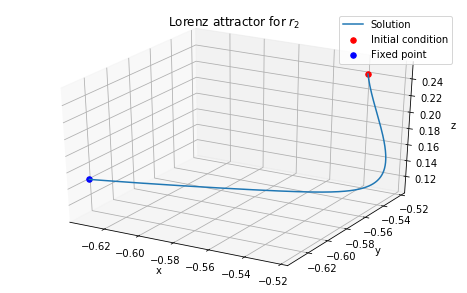

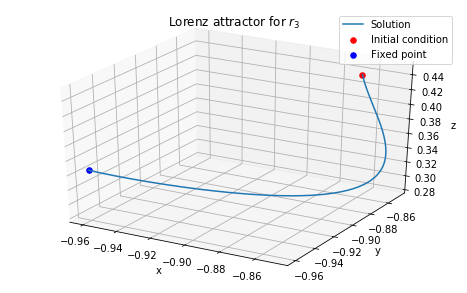

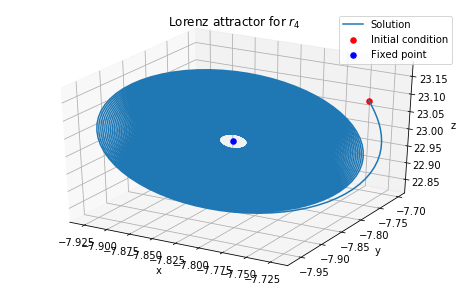

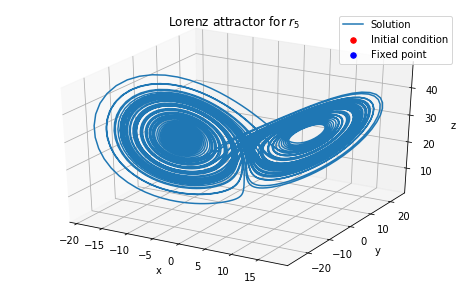

In [8]:
time = 100
h = 0.01
n = int(time/h)

def f(y, x, sigma, b, r):
    y_new = np.zeros(3)
    y_new[0] = -sigma * (y[0] - y[1])
    y_new[1] = r*y[0] - y[1] - y[0]*y[2]
    y_new[2] = y[0]*y[1] - b*y[2]
    return y_new

for i in range(len(r)):
    r_current = r[i]
    y0 = np.zeros(3)
    if r_current < 1:
        y0 = y0 + 0.1
        yn, xn = rk4.rk4(y0=y0, x0=0, f=f, h=h, n=n, f_args={'sigma':sigma, 'b':b, 'r':r_current})
    else:
        y0 = C_minus[:,i] + 0.1
        yn, xn = rk4.rk4(y0=y0, x0=0, f=f, h=h, n=n, f_args={'sigma':sigma, 'b':b, 'r':r_current})
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(111, projection='3d')
    plt.title("Lorenz attractor for $r_{0}$".format(i+1))
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.plot(yn[:,0], yn[:,1], yn[:,2], label="Solution")
    ax.scatter(xs=np.array(y0[0]), ys=np.array(y0[1]), zs=np.array(y0[2]), c="r", s=30, label="Initial condition")
    ax.scatter(xs=np.array(y0[0])-0.1, ys=np.array(y0[1])-0.1, zs=np.array(y0[2])-0.1, c="b", s=30, label="Fixed point")
    ax.legend()
    plt.show()

*Explanation:*

For the first 3 values of $r$, the fixed point is stable, and the system moves to the fixed point and stays there. For the last two values of $r$, however, the fixed point is not stable and the system does not reach it, but rather cicles around it, in case of r5 with an increasing radius. Because of that, the system as a whole is not stable. In case of r4, the radius is decreasing slowly, leading to the system being at least somewhat bound.

### Part 2)
Determine the sequence $z_k$ for $r= 27$, where $z_k$ is a local maximum in $z$ on the solution curve after $k$ periods. Plot $z_{k+1}$ as a function of $z_k$. When sufficient points are there, connect the points. The resulting function $z_{k+1}=f(z_k)$ has an intersection with the diagonal $z_{k+1}=z_k$. It is a fixed point of the function $f(z_k)$. Is the slope $m$ of this function >1,<−1 or between −1 and +1? Notice: the theory of discrete maps says that there is NO periodic solution if $|m|>1$. So, in such acase we can deduce that this solution of the Lorenz system is not periodic.

[26.1        26.1135217  26.12582872 ... 22.18873292 21.62195168
 21.07566495]
10001


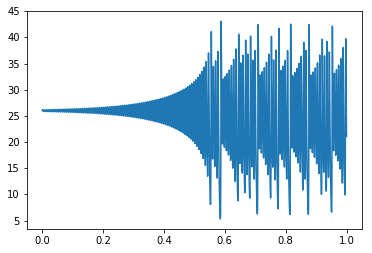

In [69]:
r = 27
def funcX(y0,x0, f_args = {}):
    return np.array([-sigma*(y0[0]-y0[1]),r*y0[0]-y0[1]-y0[0]*y0[2], y0[0]*y0[1] - b * y0[2] ])

a0 = np.sqrt(b*(r-1))
y0 = np.array([a0,a0,r-1]) + 0.1#positive solution

yn,xn = rk4.rk4(y0,np.array([0]) ,funcX,0.01,10000)
print(yn[:,2])
print(len(yn[:,2]))
#print(yn[k:2*k,2])
plt.plot(np.linspace(0,1,len(yn[:,2])),yn[:,2])

Text(0.5,1,'Maxima')

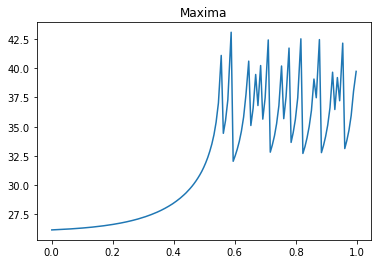

In [70]:
def findMaxima(x,y):
    x_max = np.array([])
    y_max = np.array([])
    for i in range(1,len(y)-1,1):
        if y[i-1] < y[i] and y[i+1] < y[i]:
            x_max = np.append(x_max,x[i])
            y_max = np.append(y_max,abs(y[i]))        
    return x_max,y_max
x_max, y_max = findMaxima(np.linspace(0,1,len(yn[:,2])),yn[:,2])
plt.plot(x_max,y_max,'-')
plt.title('Maxima')

146


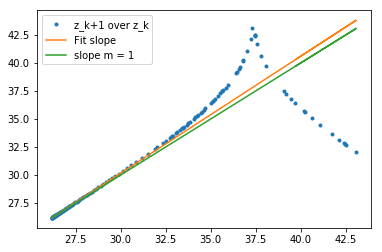

In [71]:
def line(x,a,b):
    return a*x+b
from scipy.optimize import curve_fit
print(len(y_max))
popt,pcov =curve_fit(line,y_max[:-100],y_max[1:-99])
#print(popt[0],np.sqrt(pcov[0][0]))
plt.plot(y_max[:-1],y_max[1:],'.',label='z_k+1 over z_k')
plt.plot(y_max,line(y_max,popt[0],popt[1]),label='Fit slope')

plt.plot(y_max,y_max,label='slope m = 1')
plt.legend()

One can see that the slope is bigger than 1 --> we can't find a periodic solution.